<a name="pandas">

<h2 id="pandas">Pandas</h2>

<p><a href="http://pandas.pydata.org/">pandas</a>(「パンダズ」と読む)は、データ解析を容易にする機能を提供するPythonのライブラリです。これは、<B>データフレーム(DataFrame)</B>などのデータ構造と、それらのデータ構造に対する様々な処理を施す機能を提供しています。時系列データや階層型インデックスの扱いに優れ、Numpyと連携し、MatPlotLibを利用した可視化ツールを持ち、計算の高速化も考慮して設計されています。</p>
 
 <P> Pandasを使うには、まず次のようにしてpandasパッケージをimport(取り込む）必要があります:</P>

In [4]:
import pandas as pd
import numpy as np     # numpyと連携して動作するため

<h3>Pandasのデータ構造</h3>
<P>Pandasには、プログラムで作成したデータや外部から読み込んだデータを保持するためのデータ構造として、シリーズ、データフレーム、パネルという三つの形式があります。ここでは最もよく使われるデータフレームについて紹介します。</P>
<p>

<h4>データフレーム(DataFrame)</h4>
<P>
データフレームはエクセルファイルのような2次元のラベル付きのデータ構造です。それぞれの行と列に名前(ラベル）を付けることができ、それぞれ行ラベル(index)と列ラベル(columns)といいます。そして列ごとに、数値、文字列、ブール値など別々の型の値を持たせることができます。
</P>
<P>データフレームを作成するにはいろいろな方法がありますが、もっとも一般的な方法は、まず辞書を用意し、それぞれのキーに同じ長さを持つリストを値として対応させる、というものです。その例を以下に示します。</P>

In [4]:
data = {'city' : ['Kyoto', 'Nagoya', 'Osaka', 'Yokohama'], 'population':[1.5, 2.3, 2.7, 3.7], 
        'prefecture' :['Kyoto', 'Aichi','Osaka','Kanagawa']}  # それぞれのキーが長さ４のリストを値とする辞書を作成。
df1 = pd.DataFrame(data)    # 辞書dataを基にデータフレームを作る
print(df1.columns)       # データフレームdf1の列ラベルの表示
df1  # Notebookではデータフレームは表として表示される

Index([u'city', u'population', u'prefecture'], dtype='object')


city  population prefecture
0     Kyoto         1.5      Kyoto
1    Nagoya         2.3      Aichi
2     Osaka         2.7      Osaka
3  Yokohama         3.7   Kanagawa

作成されたデータフレームには自動的にインデックス(行ラベル)が割り当てられます。また列の順序も自動で並び替え(ソート)されます。ただし、データフレーム作成の時にcolumns引数を指定すれば、列の順番を固定できます。

In [84]:
df1 = pd.DataFrame(data, columns=['city','prefecture','population'])    # データフレームを作る
print(df1.columns)       # 列ラベルの表示
df1  # Notebookではデータフレームは表として表示される

Index(['city', 'prefecture', 'population'], dtype='object')


city prefecture  population
0     Kyoto      Kyoto         1.5
1    Nagoya      Aichi         2.3
2     Osaka      Osaka         2.7
3  Yokohama   Kanagawa         3.7

インデックス（行ラベル)も次のようにして付け替えることができます。

In [85]:
df1.index = [4,3,2,1]
df1  # Notebookではデータフレームは表として表示される

city prefecture  population
4     Kyoto      Kyoto         1.5
3    Nagoya      Aichi         2.3
2     Osaka      Osaka         2.7
1  Yokohama   Kanagawa         3.7

データフレーム生成時に、対応するデータがない列ラベルを指定した時にはエラーにはならずに、その列の値として NaN (「非数値(Not a Number)」、この場合は値が<B>欠損</B>していることを意味)が割り当てられます。


In [5]:
df1 = pd.DataFrame(data, columns=['city','population','prefecture','year'])    # データフレームを作る
print(df1.columns)       # 列ラベルの表示
df1  # Notebookではデータフレームは表として表示される

Index([u'city', u'population', u'prefecture', u'year'], dtype='object')


city  population prefecture year
0     Kyoto         1.5      Kyoto  NaN
1    Nagoya         2.3      Aichi  NaN
2     Osaka         2.7      Osaka  NaN
3  Yokohama         3.7   Kanagawa  NaN

データフレームの列は、辞書式の参照方法や属性指定により取り出すことができます。取り出された1次元のデータは「シリーズ(Series)」と呼ばれています。この列データは、元のデータフレームが持っていたインデックスと同じインデックスを持ち、ラベル(name)も保持されています。

In [6]:
s1 = df1['city']    # 辞書式の参照方法
print(s1)

s2 = df1.city       # 属性指定
print(s2)

0       Kyoto
1      Nagoya
2       Osaka
3    Yokohama
Name: city, dtype: object
0       Kyoto
1      Nagoya
2       Osaka
3    Yokohama
Name: city, dtype: object


列の値は修正することができます。次の例のように、列にスカラー値や配列を代入して修正することが可能です。

In [7]:
df1.year = 1956  # 大都市の政令指定年
df1  # Notebookではデータフレームは表として表示される

city  population prefecture  year
0     Kyoto         1.5      Kyoto  1956
1    Nagoya         2.3      Aichi  1956
2     Osaka         2.7      Osaka  1956
3  Yokohama         3.7   Kanagawa  1956

存在しない列に代入を行うと、新たな列が作られます。逆にdelキーワードにより列を削除することができます。

In [89]:
df1['region']=['近畿', '中部', '近畿', '関東']
df1  # Notebookではデータフレームは表として表示される

city  population prefecture  year region
0     Kyoto         1.5      Kyoto  1956     近畿
1    Nagoya         2.3      Aichi  1956     中部
2     Osaka         2.7      Osaka  1956     近畿
3  Yokohama         3.7   Kanagawa  1956     関東

In [90]:
del df1['year']
df1  # Notebookではデータフレームは表として表示される

city  population prefecture region
0     Kyoto         1.5      Kyoto     近畿
1    Nagoya         2.3      Aichi     中部
2     Osaka         2.7      Osaka     近畿
3  Yokohama         3.7   Kanagawa     関東

<h3>データの管理</h3>
pandasオブジェクトは、以下に示すようないろいろな方法で結合させることができます。
<OL>
  <LI>pandas.merge関数は、データフレームに含まれる行を、1つ以上のキーでマージすることができます。
  <LI>pandas.concat関数は、複数の列のオブジェクトを貼りわせたり、積み上げたりすることができます。
  <LI>combine_first というインスタンス・メソッドは、複数のオブジェクト間で重複する部分のデータを繋ぎあわせて、オブジェクトの欠損値を他のオブジェクトの値で穴埋めすることができます。
</OL>
以下では、例を用いてmergeとconcatという２つの関数の働きを見ていこう。

In [29]:
#pandas.merge関数の例のためのデータフレーム
df1 = pd.DataFrame( {'key': list('bbacaab'), 'data1': list(range(7))}, columns=['key','data1'])
print( df1 )
df2 = pd.DataFrame( {'key': list('abd'), 'data2': list(range(3))}, columns=['key','data2'])
print( df2 )

  key  data1
0   b      0
1   b      1
2   a      2
3   c      3
4   a      4
5   a      5
6   b      6
  key  data2
0   a      0
1   b      1
2   d      2


In [30]:
#pandas.merge関数の使用例 --- 共通の列ラベルkeyを用いてマージ
pd.merge(df1, df2)
# keyの値が'c'と'd'がないことに注意。これはデフォルトの 'inner' joint モードの結果

key  data1  data2
0   b      0      1
1   b      1      1
2   b      6      1
3   a      2      0
4   a      4      0
5   a      5      0

In [34]:
pd.merge(df1, df2, how='outer')
# 今度はkeyの値が'c'と'd'がある。これが 'outer' joint モード

key  data1  data2
0   b      0      1
1   b      1      1
2   b      6      1
3   a      2      0
4   a      4      0
5   a      5      0
6   c      3    NaN
7   d    NaN      2

In [35]:
#pandas.concat関数の例のためのデータフレーム
df1 = pd.DataFrame( {'key': list('bbacaab'), 'data1': list(range(7))}, columns=['key','data1'])
print( df1 )
df2 = pd.DataFrame( {'key': list('abd'), 'data1': list(range(3))}, columns=['key','data1'])
print( df2 )

  key  data1
0   b      0
1   b      1
2   a      2
3   c      3
4   a      4
5   a      5
6   b      6
  key  data1
0   a      0
1   b      1
2   d      2


In [36]:
#pandas.concat関数の使用例 --- 行を「積み上げる」
pd.concat([df1,df2])

key  data1
0   b      0
1   b      1
2   a      2
3   c      3
4   a      4
5   a      5
6   b      6
0   a      0
1   b      1
2   d      2

In [37]:
# 異なる列ラベルをもつデータフレームの場合
df1 = pd.DataFrame( {'key': list('bbacaab'), 'data1': list(range(7))}, columns=['key','data1'])
print( df1 )
df2 = pd.DataFrame( {'key': list('abd'), 'data2': list(range(3))}, columns=['key','data2'])
print( df2 )
pd.concat([df1,df2])

  key  data1
0   b      0
1   b      1
2   a      2
3   c      3
4   a      4
5   a      5
6   b      6
  key  data2
0   a      0
1   b      1
2   d      2


data1  data2 key
0      0    NaN   b
1      1    NaN   b
2      2    NaN   a
3      3    NaN   c
4      4    NaN   a
5      5    NaN   a
6      6    NaN   b
0    NaN      0   a
1    NaN      1   b
2    NaN      2   d

<h3>データの処理</h3>
データフレームに対して適用できる処理の基本について紹介します。


In [2]:
import pandas as pd
data = {'city' : ['Kyoto', 'Nagoya', 'Osaka', 'Yokohama'], 'population':[1.5, 2.3, 2.7, 3.7], 
        'prefecture' :['Kyoto', 'Aichi','Osaka','Kanagawa']}  # それぞれのキーは長さ４のリストを値とする
df1 = pd.DataFrame(data, index=[4,3,2,1])    # データフレームを作る
df1  # Notebookではデータフレームは表として表示される


city  population prefecture
4     Kyoto         1.5      Kyoto
3    Nagoya         2.3      Aichi
2     Osaka         2.7      Osaka
1  Yokohama         3.7   Kanagawa

ある要素が表ラベルや列ラベルに現れているかどうかは in を用いて調べられます。

In [6]:
print('city' in df1.columns)  # 列ラベルの中に'city'があるか

print(4 in df1.index)     # 行ラベルのチェック

False
False


ある要素がデータフレームに現れているかどうかは少し工夫がいります。これには<B>部分データを取り出す</B>処理が必要になります。

|プロパティ | 説明 |用例(dfはデータフレーム)|
|:-|:-|:-|
|at | 行ラベルと列ラベルによりスカラー値(1個の要素)を参照する。locより高速|df.at[行ラベル,列ラベル]|
|iat | 行番号と列番号によりスカラー値(1個の要素)を参照する。ilocより高速|df.iat[行番号,列番号]|
|loc | 行ラベルと列ラベルにより、ベクトル(複数の要素)もしくはスカラー値を参照する|df.loc[行ラベル,列ラベル]|
|iloc | 行番号と列番号により、ベクトル(複数の要素)もしくはスカラー値を参照する|df.iloc[行番号,列番号]|
|ix | locとして機能するが、ラベルが指定されていなければilocとして機能する|df.ix[行ラベル,列ラベル]|

In [5]:
df = pd.DataFrame(np.arange(12).reshape(3,4), columns=list('abcd'),index=list('xyz'))
df    # Notebookではデータフレームは表として表示される

a  b   c   d
x  0  1   2   3
y  4  5   6   7
z  8  9  10  11

In [63]:
# 行ラベルと列ラベルを指定してスカラー値を参照
print( df.at['y','b'] )
print( df.loc['y','b'] )
print( df.ix['y','b'])

5
5
5


In [98]:
# 行ラベルのスライスと列ラベルを指定してベクトルを参照   --- atは使用できない
print( df.loc['x':'y', 'c'])     # Pythonのスライスと異なり、「先頭:最後」を表す
print( df.ix['x':'y', 'c'])

x    2
y    6
Name: c, dtype: int32
x    2
y    6
Name: c, dtype: int32


In [96]:
# 行ラベルの範囲指定と列ラベルの範囲を指定して部分データフレームを参照   --- atは使用できない
print( df.loc['x':'y', 'b':'c'])    # Pythonのスライスと異なり、「先頭:最後」を表す
df.ix['x':'y', 'b':'c']

   b  c
x  1  2
y  5  6


b  c
x  1  2
y  5  6

In [6]:
# 行と列を複数指定して部分データフレームを参照
print(df.loc[['x','z'],['a','c']])

   a   c
x  0   2
z  8  10


In [69]:
# 行番号と列番号を指定してスカラー値を参照
print( df.iat[0,2] )   # 0行2列目
print( df.iloc[0,2] )
print( df.ix[0,2])

2
2
2


In [92]:
# 行番号のスライスと列番号のスライスを指定して部分データフレームを参照   --- iatは使用できない
print( df.iloc[0:2, 1:3])       # 最初の2行、かつ2番目と3番目の列---Pythonのスライスと同じ意味になる
df.ix[0:2,1:3]

   b  c
x  1  2
y  5  6


b  c
x  1  2
y  5  6

In [94]:
# 条件を指定して部分データフレームを取り出す(フィルタリング)：df.c > 5を満たす行から最初の2列のデータを参照
df.ix[df.c > 5,:2]      

a  b
y  4  5
z  8  9

<h4>基本的な演算処理</h4>
データフレームの四則演算は、演算記号 +-*/による方法と、メソッドを用いて行う方法があります。

In [99]:
df1 = pd.DataFrame(np.arange(6).reshape(2,3), columns=list('abc'))
df2 = pd.DataFrame(np.arange(10,16).reshape(2,3), columns=list('abc'))
print(df1)
print(df2)

   a  b  c
0  0  1  2
1  3  4  5
    a   b   c
0  10  11  12
1  13  14  15


In [102]:
print(df1 + df2)    # 加算
df3 = df1.add(df2)
print(df3)

    a   b   c
0  10  12  14
1  16  18  20
    a   b   c
0  10  12  14
1  16  18  20


In [103]:
print(df1 - df2)
df3 = df1.sub(df2)
print(df3)

    a   b   c
0 -10 -10 -10
1 -10 -10 -10
    a   b   c
0 -10 -10 -10
1 -10 -10 -10


In [105]:
print(df1 * df2)
df3 = df1.mul(df2)
print(df3)

    a   b   c
0   0  11  24
1  39  56  75
    a   b   c
0   0  11  24
1  39  56  75


In [106]:
print(df1 / df2)
df3 = df1.div(df2)
print(df3)

          a         b         c
0  0.000000  0.090909  0.166667
1  0.230769  0.285714  0.333333
          a         b         c
0  0.000000  0.090909  0.166667
1  0.230769  0.285714  0.333333


このように要素ごとの演算が行われます。またメソッドを使っても、もとのデータフレームの値は変化しません。
ですから、例えばdf1 + df2 の結果をdf1 の値としたい場合は、 df1 = df1.add(df2) のように書く必要があります。

<h3>比較演算</h3>
メソッドとして下の表に示す比較演算子が用意されています。比較結果は要素ごとに真理値(ブール値）であらわされます。NaNとの比較をしたり、ラベルが異なる場合はFalseが値になります。

|メソッド|説明 (df1.lt(df2)のように使った場合)|
|:-|:-|
|lt | df1 < df2 の要素ごとの比較結果を要素と留守データフレームを返す|
|gt | df1 > df2 の要素ごとの比較結果を要素と留守データフレームを返す|
|le | df1 <= df2 の要素ごとの比較結果を要素と留守データフレームを返す|
|ge | df1 >= df2 の要素ごとの比較結果を要素と留守データフレームを返す|
|eq | df1 == df2 の要素ごとの比較結果を要素と留守データフレームを返す|
|ne | df1≠ df2 の要素ごとの比較結果を要素と留守データフレームを返す|

In [124]:
df1 = pd.DataFrame(np.arange(6).reshape(2,3), columns=list('xyz'))
df2 = pd.DataFrame(np.arange(12).reshape(3,4), columns=list('xyza'))
print(df1,"\n", df2)

   x  y  z
0  0  1  2
1  3  4  5 
    x  y   z   a
0  0  1   2   3
1  4  5   6   7
2  8  9  10  11


In [125]:
df1.lt(df2)

a      x      y      z
0  False  False  False  False
1  False   True   True   True
2  False  False  False  False

In [126]:
df2.gt(df1)

a      x      y      z
0  False  False  False  False
1  False   True   True   True
2  False  False  False  False

In [127]:
df1.le(df2)

a      x      y      z
0  False   True   True   True
1  False   True   True   True
2  False  False  False  False

In [128]:
df2.ge(df1)

a      x      y      z
0  False   True   True   True
1  False   True   True   True
2  False  False  False  False

In [129]:
df1.eq(df2)

a      x      y      z
0  False   True   True   True
1  False  False  False  False
2  False  False  False  False

In [130]:
df2.ne(df1)

a      x      y      z
0  True  False  False  False
1  True   True   True   True
2  True   True   True   True

<h3>関数の適用</h3>
データフレームなどのpandasのオブジェクトに特定の関数を適用するには、Numpyの関数を使う、pandasで用意されている関数やメソッドを使う、外部関数を適用するためのメソッドを使うという方法があります。

ここでは外部関数、つまりPythonの一般の関数を適用する方法を紹介します。それには次の表のメソッドを使います。
<P>
大きく分けてベクトル(データフレームの列など）に関数を適用するメソッドと、一つ一つの要素に適用するメソッドがあります。ベクトルデータにはapplyを、一つ一つの要素にはmapまたはapplymapを用います。

|メソッド | 説明|
|:-|:-|
|apply |シリーズやデータフレームの行や列に関数を適用|
|map |シリーズ、データフレームの行や列の各要素に対して辞書変数や関数を用いて、結果を計算|
|applymap |データフレームの各要素に作用する関数を適用|

In [132]:
df = pd.DataFrame(np.arange(6).reshape(2,3), columns=list('xyz'),index=list('ab'))
df

x  y  z
a  0  1  2
b  3  4  5

In [138]:
df.apply(max)     # 各列の最大値を計算

x    3
y    4
z    5
dtype: int64

In [139]:
df.apply(min)    # 各列の最小値を計算

x    0
y    1
z    2
dtype: int64

In [141]:
df.apply(sum) 　　# 各列の総和を計算

x    3
y    5
z    7
dtype: int64

In [147]:
import numpy as np
df.apply(np.mean)   # 各列の平均を計算

x    1.5
y    2.5
z    3.5
dtype: float64

In [154]:
dic = {x:x*10 for x in range(6)}
print(dic)   # 辞書を作成

df.y.map(dic)      # df['y']にdicを適用 --- df.map(dic) は使えない

{0: 0, 1: 10, 2: 20, 3: 30, 4: 40, 5: 50}


a    10
b    40
Name: y, dtype: int64

In [152]:
def func(x):
    if (x % 2 == 0):
        return 'even'
    else: 
        return 'odd'

df.applymap(func)

x     y     z
a  even   odd  even
b   odd  even   odd

<h3>プロット機能</h3>
PandasにはMatplotlibのサポートによって図を生成する機能があります。Matplotlibを使うのに比べ、簡便にできるのが特徴です。
<P>
はじめにプロットを作成する例を示します。この例ではlineプロットとbarプロットを一つずつ作成しています、

In [1]:
import pandas as pd
import numpy as np
df1 = pd.DataFrame(np.random.randn(100,3), columns=list('xyz'), index=pd.date_range('1/1/2017',periods=100))
df1.head()  # 作成したデータフレームの先頭の行を示す
                   

x         y         z
2017-01-01 -1.850147 -1.725276  0.595447
2017-01-02  0.585508  0.466685 -0.989327
2017-01-03  2.467541  0.697965 -0.477884
2017-01-04 -1.384910 -0.509906 -0.585245
2017-01-05 -0.253804 -0.061937  0.203567

In [2]:
df1 = df1.cumsum() # 累積和
df1.head()  # 上の表と比べてどのように変化しているか？

x         y         z
2017-01-01 -1.850147 -1.725276  0.595447
2017-01-02 -1.264640 -1.258591 -0.393879
2017-01-03  1.202902 -0.560626 -0.871764
2017-01-04 -0.182009 -1.070532 -1.457008
2017-01-05 -0.435813 -1.132470 -1.253442

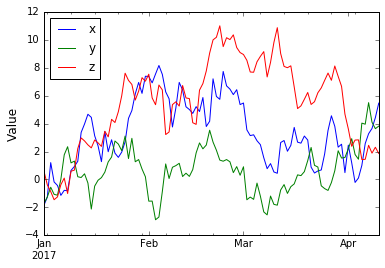

In [3]:
%matplotlib inline
ax = df1.plot()
ax.set_ylabel('Value',fontsize=12)   # 折れ線グラフ

In [4]:
df2 = pd.DataFrame(np.random.rand(5,3),columns=list('abc'))
df2

a         b         c
0  0.103967  0.567218  0.693037
1  0.145787  0.000043  0.644688
2  0.257817  0.167234  0.923395
3  0.631923  0.564506  0.653695
4  0.249690  0.659078  0.860882

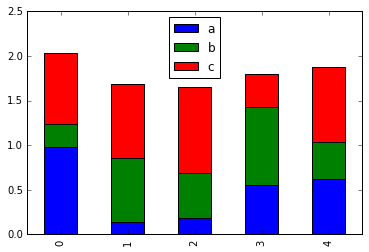

In [171]:
df2.plot(kind='bar',stacked=True)    # bar形式の棒グラフ

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb8192188d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fb819085ad0>]], dtype=object)

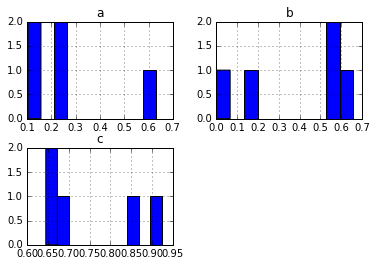

In [5]:
df2.hist()  # ヒストグラム

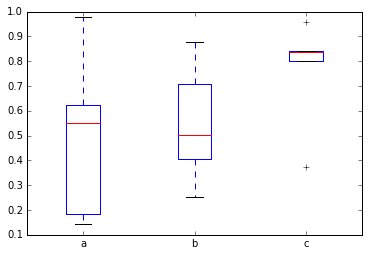

In [176]:
df2.plot(kind='box')    # 箱ひげ図

<h2>ファイルの入出力</h2>
csvファイルの読み込み（入力）とcsv形式のファイルとして書き出し（出力）ができる。
<h3>CSVファイルの読み込み</h3>
read_csv関数を用いれば、1行目をヘッダー(header)として認識する。ヘッダーがない場合はheader=Noneとしておくこと。<BR>
この実習には、あらかじめ<A HREF="http://lang.sist.chukyo-u.ac.jp/Classes/PythonProbStat/SampleData.zip">SampleData.zip</A>をダウンロードし、Intro2Pandas.ipynbと同じフォルダーに展開しておくこと。

In [9]:
import pandas as pd
df1 = pd.read_csv("SampleData/Example1.csv")   # ヘッダーがあるcsvファイルの読み込み
df2 = pd.read_csv("SampleData/Example2.csv", header=None)   # ヘッダーがないcsvファイルの読み込み
df3 = pd.read_csv( "SampleData/Example2.csv", names=('a', 'b', 'c') ) # ヘッダーがないファイルを読み込み、ヘッダーをつける
# いずれも行ラベルは勝手に　0,1,2,...とつけられる
dft =  pd.read_csv("SampleData/ExampleT.csv", delimiter="\t")   # 区切りがコンマではなくタブの場合

In [10]:
df1

name  height  weight  gender
0    Taro     180      80    male
1  Hanako     160      45  female
2    Ziro     170      65    male

In [11]:
df2

0    1   2       3
0    Taro  180  80    male
1  Hanako  160  45  female
2    Ziro  170  65    male

In [12]:
df3

a   b       c
Taro    180  80    male
Hanako  160  45  female
Ziro    170  65    male

In [13]:
dft

name  height  weight  gender
0    Taro     180      80    male
1  Hanako     160      45  female
2    Ziro     170      65    male

<h3>CSVファイルへの書き出し</h3>
to_csv関数により出力される。

データフレームの形式(列ラベルも行ラベルもついたまま）で出力されるので、行ラベルを出力したくない場合はindex=Falseを指定すること。

また区切り記号をコンマではなくタブにするには、sep='\t'を指定する

In [14]:
df1.to_csv('Output1.csv' )    # 行ラベルあり
df1.to_csv('Output2.csv', index=False)    # 行ラベル無し
df1.to_csv('OutputT.csv',sep='\t')     # タブを区切り記号に

<h2>演習問題</h2>
この演習問題では、Fisherのiris(あやめ）のデータを用いる。まず以下を実行して、irisデータをロードし、pandas形式に変換し、変数dfの値とせよ。

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target_names[iris.target]
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa

以下の問題に解答せよ。
<BR>1. dfの中身を表示させないで、dfの行数、dfの列ラベル、dfのtarget列の値の種類(上の結果では、setosaだけが表示されている)をそれぞれ答えよ。

In [ ]:
# 問題1

<BR>2. df.targetの値が'setosa'である行から、sepal lengthとpetal lengthの列だけをもつ部分データフレームを取り出し、変数setosaの値とせよ（フィルタリング)。

In [ ]:
# 問題2

<BR>3.同様に、df.targetの値が'versicolor'である行から、sepal lengthとpetal lengthの列だけをもつ部分データフレームを取り出し、変数versicolorの値とせよ（フィルタリング)。

In [ ]:
# 問題3

<BR>4. この２つのデータフレームを連結してひとつのデータフレームを作り、変数Xの値とせよ。

In [ ]:
# 問題4

<BR> 5. setosaのsepal lengthの列とpetal lengthの列データをそれぞれsetosa_sepal, setosa_petal変数の値とせよ。

In [ ]:
# 問題5

<BR>6. 同様に、versicolorのsepal lengthの列とpetal lengthの列データをそれぞれversicolor_sepal, versicolor_petal変数の値とせよ。

In [ ]:
# 問題6

<BR>7, 以下のコードを走らせ、散布図を表示せよ。そしてそれぞれのコードの意味を説明せよ。(注意: 前の2問の結果を使っている)

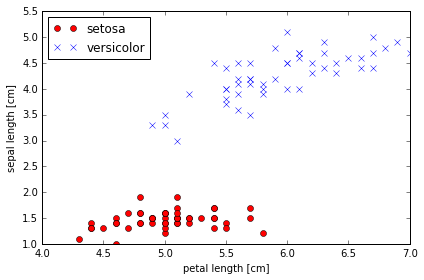

In [60]:
# plot data
plt.plot(setosa_sepal, setosa_petal,'ro', label='setosa',)
plt.plot(versicolor_sepal, versicolor_petal,'bx', label='versicolor')

plt.xlabel('petal length [cm]')
plt.ylabel('sepal length [cm]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
# 問題7

<BR>8. irisデータにある3種類のアヤメに対し、問題7を参考にして、なるべく少ない手間でsepal lengthをx軸、petal lengthをy軸とした散布図を書け。次のような図が得られると良い。
<IMG src="iris.png" />

In [ ]:
# 問題8

<BR> 9. 以下の問いに答えよ。
 <OL>
   <LI>irisデータのすべてのデータに対し、sepal lengthの平均と標準偏差を求めよ。なお、平均は mean、標準偏差は std というインスタンス・メソッドで計算できる。
   <LI>irisデータのsepal lengthデータを取り出し、これを<B>標準化</B>せよ。ここで標準化とは平均が0, 分散が1となるようにデータを変換することをいう。
   <LI>標準化したデータを用いて、問題8と同様に、sepal lengthをx軸、petal lengthをy軸とした散布図を書いてみよ。参考図は下:
   <IMG src="iris3.png" />
 </OL>

In [ ]:
# 問題9